# Advanced analysis of data frames

## Getting and pre-processing the police stop data set

### Loading all required packages

In [1]:
using CSV
using CategoricalArrays
using Chain
using DataFrames
using Dates
using Distributions
using FreqTables
using GLM
using Plots
using Random
using ROCAnalysis
using Statistics

In [2]:
owensboro = CSV.read("owensboro.csv", DataFrame; missingstring="NA")

Row,raw_row_number,date,time,location,lat,lng,sector,subject_age,subject_race,subject_sex,officer_id_hash,type,violation,arrest_made,citation_issued,outcome,vehicle_registration_state,raw_race
,Int64,Date,Time,String,Float64,Float64?,String15?,Int64?,String31?,String7,String15,String15?,String,Bool,Bool,String15,String3?,String31?
1,1,2016-08-04,13:52:00,"1016 HALL ST, OWENSBORO, KY, 42301",37.7673,-87.0977,BRAVO,30,white,male,0b087b613e,pedestrian,"POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE); DRUG PARAPHERLIA - BUY/POSSESS",true,true,arrest,KY,WHITE
2,2,2016-04-03,01:48:00,"W PARRISH AVE/BYPASS, OWENSBORO, KY, 42301",37.7557,-87.1561,WEST,17,white,male,cccb830893,vehicular,FAILURE TO ILLUMITE HEAD LAMPS; NO OPERATORS-MOPED LICENSE; NO REGISTRATION PLATES,false,true,citation,KY,WHITE
3,3,2015-09-13,04:57:00,"2511 HWY 144 ST, OWENSBORO, KY, 42303",37.7777,-87.0871,BRAVO,33,white,male,5ad1b66604,vehicular,"NO TAIL LAMPS; OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF; POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE); FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF; VIOLATION UNKNOWN",true,true,arrest,KY,WHITE
4,4,2016-01-05,13:16:00,"CARTER RD & BITTEL RD, OWENSBORO, KY, 42301",37.7514,-87.1468,CHARLIE,52,white,female,78fbcbf614,vehicular,"OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND; DRIVING DUI SUSPENDED LICENSE - 1ST OFF (AGG CIRCUM)",true,true,arrest,KY,WHITE
5,5,2016-04-06,02:15:00,"FREDERICA ST & FAIRFAX DR, OWENSBORO, KY, 42301",37.734,-87.1202,FOX,33,white,male,78fbcbf614,vehicular,OPERATING ON SUS OR REV OPER LICENSE,false,true,citation,KY,WHITE
6,6,2015-11-05,23:15:00,"FREDERICA ST AND WASHINGTON AVE, OWENSBORO, KY, 42303",37.7513,-87.1116,DELTA,32,white,male,60dc0a01bb,vehicular,FAILURE TO WEAR SEAT BELTS,false,true,citation,KY,WHITE
7,7,2016-02-14,02:40:00,"1301 FREDERICA ST, OWENSBORO, KY, 42301",37.7635,-87.1125,DELTA,28,white,male,60dc0a01bb,vehicular,OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF,true,true,arrest,KY,WHITE
8,8,2016-02-09,16:59:00,"1300 MCFARLAND AVE, OWENSBORO, KY, 42301",37.759,-87.146,CHARLIE,24,white,male,fbd3670efb,vehicular,DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT; LICENSE TO BE IN POSSESSION,false,true,citation,KY,WHITE
9,9,2016-04-16,23:14:00,"700 CRABTREE AVE, OWENSBORO, KY, 42301",37.7677,-87.1342,ALPHA,23,white,female,fbd3670efb,vehicular,"OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND; DRIVING ON DUI SUSPENDED LICENSE -1ST OFFENSE; POSS OF OPEN ALC BEVERAGE CONT IN MOTOR VEH PROHIBITED; FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF; FAILURE TO WEAR SEAT BELTS",true,true,arrest,KY,WHITE


In [3]:
close(archive)

LoadError: UndefVarError: `archive` not defined

In [4]:
summary(owensboro)

"6921×18 DataFrame"

In [5]:
describe(owensboro, :nunique, :nmissing, :eltype)

Row,variable,nunique,nmissing,eltype
,Symbol,Union…,Int64,Type
1,raw_row_number,,0,Int64
2,date,726,0,Date
3,time,1352,0,Time
4,location,4481,0,String
5,lat,,0,Float64
6,lng,,9,"Union{Missing, Float64}"
7,sector,10,10,"Union{Missing, String15}"
8,subject_age,,3,"Union{Missing, Int64}"
9,subject_race,4,18,"Union{Missing, String31}"


In [6]:
select!(owensboro, :date, :type, :arrest_made, :violation)

Row,date,type,arrest_made,violation
,Date,String15?,Bool,String
1,2016-08-04,pedestrian,true,"POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE); DRUG PARAPHERLIA - BUY/POSSESS"
2,2016-04-03,vehicular,false,FAILURE TO ILLUMITE HEAD LAMPS; NO OPERATORS-MOPED LICENSE; NO REGISTRATION PLATES
3,2015-09-13,vehicular,true,"NO TAIL LAMPS; OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF; POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE); FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF; VIOLATION UNKNOWN"
4,2016-01-05,vehicular,true,"OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND; DRIVING DUI SUSPENDED LICENSE - 1ST OFF (AGG CIRCUM)"
5,2016-04-06,vehicular,false,OPERATING ON SUS OR REV OPER LICENSE
6,2015-11-05,vehicular,false,FAILURE TO WEAR SEAT BELTS
7,2016-02-14,vehicular,true,OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF
8,2016-02-09,vehicular,false,DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT; LICENSE TO BE IN POSSESSION
9,2016-04-16,vehicular,true,"OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND; DRIVING ON DUI SUSPENDED LICENSE -1ST OFFENSE; POSS OF OPEN ALC BEVERAGE CONT IN MOTOR VEH PROHIBITED; FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF; FAILURE TO WEAR SEAT BELTS"


In [7]:
summary(owensboro)

"6921×4 DataFrame"

In [8]:
describe(owensboro, :nunique, :nmissing, :eltype)

Row,variable,nunique,nmissing,eltype
,Symbol,Union…,Int64,Type
1,date,726,0,Date
2,type,2,42,"Union{Missing, String15}"
3,arrest_made,,0,Bool
4,violation,1979,0,String


### Comparison of functions that perform operations on columns

In [9]:
df = DataFrame(id=[1, 2, 1, 2], v=1:4)

Row,id,v
,Int64,Int64
1,1,1
2,2,2
3,1,3
4,2,4


In [10]:
combine(df, :v => sum => :sum)

Row,sum
,Int64
1,10


In [11]:
transform(df, :v => sum => :sum)

Row,id,v,sum
,Int64,Int64,Int64
1,1,1,10
2,2,2,10
3,1,3,10
4,2,4,10


In [12]:
select(df, :v => sum => :sum)

Row,sum
,Int64
1,10
2,10
3,10
4,10


In [13]:
gdf = groupby(df, :id)

Row,id,v
,Int64,Int64
1,1,1
2,1,3
Row,id,v
,Int64,Int64
1,2,2
2,2,4


In [14]:
combine(gdf, :v => sum => :sum)

Row,id,sum
,Int64,Int64
1,1,4
2,2,6


In [15]:
transform(gdf, :v => sum => :sum)

Row,id,v,sum
,Int64,Int64,Int64
1,1,1,4
2,2,2,6
3,1,3,4
4,2,4,6


In [16]:
select(gdf, :v => sum => :sum)

Row,id,sum
,Int64,Int64
1,1,4
2,2,6
3,1,4
4,2,6


### Common forms of operation specification syntax

In [17]:
select(df,
       :v => identity => :v1,
       :v => identity,
       :v => :v2,
       :v)

Row,v1,v_identity,v2,v
,Int64,Int64,Int64,Int64
1,1,1,1,1
2,2,2,2,2
3,3,3,3,3
4,4,4,4,4


## Investigating the violation column

### Finding the most frequent violations

In [18]:
owensboro.violation

6921-element Vector{String}:
 "POSS CONT SUB 1ST DEG, 1ST OFF " ⋯ 18 bytes ⋯ " DRUG PARAPHERLIA - BUY/POSSESS"
 "FAILURE TO ILLUMITE HEAD LAMPS;" ⋯ 20 bytes ⋯ "LICENSE; NO REGISTRATION PLATES"
 "NO TAIL LAMPS; OPER MTR VEHICLE" ⋯ 136 bytes ⋯ "EC, 1ST OFF; VIOLATION UNKNOWN"
 "OPER MTR VEH U/INFLU ALC/DRUGS/" ⋯ 49 bytes ⋯ " LICENSE - 1ST OFF (AGG CIRCUM)"
 "OPERATING ON SUS OR REV OPER LICENSE"
 "FAILURE TO WEAR SEAT BELTS"
 "OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF"
 "DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT; LICENSE TO BE IN POSSESSION"
 "OPER MTR VEH U/INFLU ALC/DRUGS/" ⋯ 183 bytes ⋯ "FF; FAILURE TO WEAR SEAT BELTS"
 "OPER MTR VEHICLE U/INFLUENCE AL" ⋯ 77 bytes ⋯ " DRUG PARAPHERLIA - BUY/POSSESS"
 "OPER MTR VEHICLE U/INFLUENCE AL" ⋯ 86 bytes ⋯ "NCE; NO OPERATORS-MOPED LICENSE"
 "NO REGISTRATION PLATES; FAILURE" ⋯ 23 bytes ⋯ "ARD; NO OPERATORS-MOPED LICENSE"
 "OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF"
 ⋮
 "NO REGISTRATION PLATES; FAILURE TO PRODUCE

In [19]:
violation_list = [strip.(split(x, ";")) for x in owensboro.violation]

6921-element Vector{Vector{SubString{String}}}:
 ["POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)", "DRUG PARAPHERLIA - BUY/POSSESS"]
 ["FAILURE TO ILLUMITE HEAD LAMPS", "NO OPERATORS-MOPED LICENSE", "NO REGISTRATION PLATES"]
 ["NO TAIL LAMPS", "OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF", "POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)", "FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF", "VIOLATION UNKNOWN"]
 ["OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND", "DRIVING DUI SUSPENDED LICENSE - 1ST OFF (AGG CIRCUM)"]
 ["OPERATING ON SUS OR REV OPER LICENSE"]
 ["FAILURE TO WEAR SEAT BELTS"]
 ["OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF"]
 ["DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT", "LICENSE TO BE IN POSSESSION"]
 ["OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND", "DRIVING ON DUI SUSPENDED LICENSE -1ST OFFENSE", "POSS OF OPEN ALC BEVERAGE CONT IN MOTOR VEH PROHIBITED", "FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF

In [20]:
violation_flat = reduce(vcat, violation_list)

13555-element Vector{SubString{String}}:
 "POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)"
 "DRUG PARAPHERLIA - BUY/POSSESS"
 "FAILURE TO ILLUMITE HEAD LAMPS"
 "NO OPERATORS-MOPED LICENSE"
 "NO REGISTRATION PLATES"
 "NO TAIL LAMPS"
 "OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF"
 "POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)"
 "FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"
 "VIOLATION UNKNOWN"
 "OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND"
 "DRIVING DUI SUSPENDED LICENSE - 1ST OFF (AGG CIRCUM)"
 "OPERATING ON SUS OR REV OPER LICENSE"
 ⋮
 "FAILURE TO WEAR SEAT BELTS"
 "SPEEDING 11 MPH OVER LIMIT"
 "NO REGISTRATION RECEIPT"
 "SPEEDING 17 MPH OVER LIMIT"
 "FAILURE TO WEAR SEAT BELTS"
 "LICENSE TO BE IN POSSESSION"
 "FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"
 "NO REGISTRATION PLATES"
 "NO REGISTRATION RECEIPT"
 "SPEEDING 13 MPH OVER LIMIT"
 "FAILURE OF NON-OWNER OPERATOR TO MAINTAIN REQ INS/SEC, 1ST OFF"
 "NO OTHER STATE REGISTRATION

In [21]:
@chain violation_flat begin
    freqtable
    sort
end

264-element Named Vector{Int64}
Dim1                                                                                   │ 
───────────────────────────────────────────────────────────────────────────────────────┼─────
ALC INTOX IN A PUB PLACE 3RD OR > OFF IN 12 MONTHS                                     │    1
BURGLARY, 3RD DEGREE                                                                   │    1
CHANGING DRIVERS-CAR IN MOTION (RECKLESS DRIVING)                                      │    1
CRIMIL MISCHIEF, 1ST DEGREE                                                            │    1
CRIMIL TRESPASS-1ST DEGREE                                                             │    1
CRIMIL TRESPASSING-2ND DEGREE                                                          │    1
DEFECTIVE BRAKES                                                                       │    1
DISPLAY OF ILLEGAL/ALTERED REGISTRATION PLATE                                          │    1
DISREGARD SIGLS FROM OFFICERS DI

In [22]:
@chain violation_flat begin
    filter(contains("SPEEDING"), _)
    freqtable
    sort
end

20-element Named Vector{Int64}
Dim1                             │ 
─────────────────────────────────┼────
SPEEDING 07 MPH OVER LIMIT       │   2
SPEEDING 24 MPH OVER LIMIT       │   5
SPEEDING 08 MPH OVER LIMIT       │   9
SPEEDING 23 MPH OVER LIMIT       │   9
SPEEDING 22 MPH OVER LIMIT       │  12
SPEEDING 25 MPH OVER LIMIT       │  12
SPEEDING 26 MPH OR > SPEED LIMIT │  14
SPEEDING 21 MPH OVER LIMIT       │  16
SPEEDING 19 MPH OVER LIMIT       │  18
SPEEDING 09 MPH OVER LIMIT       │  26
SPEEDING 18 MPH OVER LIMIT       │  34
SPEEDING 20 MPH OVER LIMIT       │  46
SPEEDING 17 MPH OVER LIMIT       │  54
SPEEDING 16 MPH OVER LIMIT       │  55
SPEEDING 14 MPH OVER LIMIT       │  59
SPEEDING 12 MPH OVER LIMIT       │  85
SPEEDING 11 MPH OVER LIMIT       │  88
SPEEDING 13 MPH OVER LIMIT       │  97
SPEEDING 15 MPH OVER LIMIT       │ 137
SPEEDING 10 MPH OVER LIMIT       │ 289

In [23]:
violation_flat_clean = [contains(x, "SPEEDING") ? "SPEEDING" : x for x in violation_flat]

13555-element Vector{AbstractString}:
 "POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)"
 "DRUG PARAPHERLIA - BUY/POSSESS"
 "FAILURE TO ILLUMITE HEAD LAMPS"
 "NO OPERATORS-MOPED LICENSE"
 "NO REGISTRATION PLATES"
 "NO TAIL LAMPS"
 "OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF"
 "POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)"
 "FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"
 "VIOLATION UNKNOWN"
 "OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND"
 "DRIVING DUI SUSPENDED LICENSE - 1ST OFF (AGG CIRCUM)"
 "OPERATING ON SUS OR REV OPER LICENSE"
 ⋮
 "FAILURE TO WEAR SEAT BELTS"
 "SPEEDING"
 "NO REGISTRATION RECEIPT"
 "SPEEDING"
 "FAILURE TO WEAR SEAT BELTS"
 "LICENSE TO BE IN POSSESSION"
 "FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"
 "NO REGISTRATION PLATES"
 "NO REGISTRATION RECEIPT"
 "SPEEDING"
 "FAILURE OF NON-OWNER OPERATOR TO MAINTAIN REQ INS/SEC, 1ST OFF"
 "NO OTHER STATE REGISTRATION RECEIPT"

In [24]:
sort(freqtable(violation_flat_clean), rev=true)

245-element Named Vector{Int64}
Dim1                                                                                   │ 
───────────────────────────────────────────────────────────────────────────────────────┼─────
FAILURE TO WEAR SEAT BELTS                                                             │ 2689
NO REGISTRATION PLATES                                                                 │ 1667
FAILURE TO PRODUCE INSURANCE CARD                                                      │ 1324
SPEEDING                                                                               │ 1067
NO REGISTRATION RECEIPT                                                                │  701
FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF                                 │  677
OPERATING ON SUS OR REV OPER LICENSE                                                   │  472
FAILURE TO NOTIFY ADRS CHANGE TO DEPT OF TRANS                                         │  409
NO OPERATORS-MOPED LICENSE      

Here is a way to get the same in DataFrames.jl

In [25]:
agg_violation = @chain owensboro begin
    select(:violation => ByRow(x -> strip.(split(x, ";"))) => :v)
end

Row,v
,Array…
1,"SubString{String}[""POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)"", ""DRUG PARAPHERLIA - BUY/POSSESS""]"
2,"SubString{String}[""FAILURE TO ILLUMITE HEAD LAMPS"", ""NO OPERATORS-MOPED LICENSE"", ""NO REGISTRATION PLATES""]"
3,"SubString{String}[""NO TAIL LAMPS"", ""OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF"", ""POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)"", ""FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"", ""VIOLATION UNKNOWN""]"
4,"SubString{String}[""OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND"", ""DRIVING DUI SUSPENDED LICENSE - 1ST OFF (AGG CIRCUM)""]"
5,"SubString{String}[""OPERATING ON SUS OR REV OPER LICENSE""]"
6,"SubString{String}[""FAILURE TO WEAR SEAT BELTS""]"
7,"SubString{String}[""OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF""]"
8,"SubString{String}[""DISREGARDING TRAFFIC CONT DEV-TRAFFIC LIGHT"", ""LICENSE TO BE IN POSSESSION""]"
9,"SubString{String}[""OPER MTR VEH U/INFLU ALC/DRUGS/ETC. .08 (AGG CIRCUM), 2ND"", ""DRIVING ON DUI SUSPENDED LICENSE -1ST OFFENSE"", ""POSS OF OPEN ALC BEVERAGE CONT IN MOTOR VEH PROHIBITED"", ""FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"", ""FAILURE TO WEAR SEAT BELTS""]"


In [26]:
agg_violation = @chain owensboro begin
    select(:violation => ByRow(x -> strip.(split(x, ";"))) => :v)
    flatten(:v)
end

Row,v
,SubStrin…
1,"POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)"
2,DRUG PARAPHERLIA - BUY/POSSESS
3,FAILURE TO ILLUMITE HEAD LAMPS
4,NO OPERATORS-MOPED LICENSE
5,NO REGISTRATION PLATES
6,NO TAIL LAMPS
7,OPER MTR VEHICLE U/INFLUENCE ALC/DRUGS/ETC. .08 - 1ST OFF
8,"POSS CONT SUB 1ST DEG, 1ST OFF (METHAMPHETAMINE)"
9,"FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF"


In [27]:
agg_violation = @chain owensboro begin
    select(:violation => ByRow(x -> strip.(split(x, ";"))) => :v)
    flatten(:v)
    select(:v => ByRow(x -> contains(x, "SPEEDING") ? "SPEEDING" : x) => :v)
    groupby(:v)
    combine(nrow => :count)
    sort(:count, rev=true)
end

Row,v,count
,Abstract…,Int64
1,FAILURE TO WEAR SEAT BELTS,2689
2,NO REGISTRATION PLATES,1667
3,FAILURE TO PRODUCE INSURANCE CARD,1324
4,SPEEDING,1067
5,NO REGISTRATION RECEIPT,701
6,"FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SEC, 1ST OFF",677
7,OPERATING ON SUS OR REV OPER LICENSE,472
8,FAILURE TO NOTIFY ADRS CHANGE TO DEPT OF TRANS,409
9,NO OPERATORS-MOPED LICENSE,336


### Vectorizing functions using the the ByRow wrapper

In [28]:
sqrt(4)

2.0

In [29]:
sqrt([4, 9, 16])

LoadError: MethodError: no method matching sqrt(::Vector{Int64})

[0mClosest candidates are:
[0m  sqrt([91m::BigInt[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmpfr.jl:644[24m[39m
[0m  sqrt([91m::Float16[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmath.jl:1558[24m[39m
[0m  sqrt([91m::BigFloat[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mmpfr.jl:636[24m[39m
[0m  ...


In [30]:
ByRow(sqrt)([4, 9, 16])

3-element Vector{Float64}:
 2.0
 3.0
 4.0

In [31]:
f = ByRow(sqrt)

(::ByRow{typeof(sqrt)}) (generic function with 4 methods)

In [32]:
f([4, 9, 16])

3-element Vector{Float64}:
 2.0
 3.0
 4.0

### Flattening data frames

In [33]:
df = DataFrame(id=1:2, v=[[11, 12], [13, 14, 15]])

Row,id,v
,Int64,Array…
1,1,"[11, 12]"
2,2,"[13, 14, 15]"


In [34]:
flatten(df, :v)

Row,id,v
,Int64,Int64
1,1,11
2,1,12
3,2,13
4,2,14
5,2,15


### Convenience syntax for getting number of rows of a data frame

In [35]:
@chain DataFrame(id=[1, 1, 2, 2, 2]) begin
    groupby(:id)
    combine(nrow, nrow => :rows)
end

Row,id,nrow,rows
,Int64,Int64,Int64
1,1,2,2
2,2,3,3


### Sorting data frames

In [36]:
df = DataFrame(a=[2, 1, 2, 1, 2], b=5:-1:1)

Row,a,b
,Int64,Int64
1,2,5
2,1,4
3,2,3
4,1,2
5,2,1


In [37]:
sort(df, :b)

Row,a,b
,Int64,Int64
1,2,1
2,1,2
3,2,3
4,1,4
5,2,5


In [38]:
sort(df, [:a, :b])

Row,a,b
,Int64,Int64
1,1,2
2,1,4
3,2,1
4,2,3
5,2,5


## Preparing data for making predictions

### Initial transformation of the data

In [39]:
owensboro2 = select(owensboro,
    :arrest_made => :arrest,
    :date => ByRow(dayofweek) => :day,
    :type,
    [:violation => ByRow(x -> contains(x, agg_violation.v[i])) => "v$i" for i in 1:4])

Row,arrest,day,type,v1,v2,v3,v4
,Bool,Int64,String15?,Bool,Bool,Bool,Bool
1,true,4,pedestrian,false,false,false,false
2,false,7,vehicular,false,true,false,false
3,true,7,vehicular,false,false,false,false
4,true,2,vehicular,false,false,false,false
5,false,3,vehicular,false,false,false,false
6,false,4,vehicular,true,false,false,false
7,true,7,vehicular,false,false,false,false
8,false,2,vehicular,false,false,false,false
9,true,6,vehicular,true,false,false,false


In [40]:
[:violation => ByRow(x -> contains(x, agg_violation.v[i])) => "v$i" for i in 1:4]

4-element Vector{Pair{Symbol, Pair{ByRow{var"#18#20"{Int64}}, String}}}:
 :violation => (ByRow{var"#18#20"{Int64}}(var"#18#20"{Int64}(1)) => "v1")
 :violation => (ByRow{var"#18#20"{Int64}}(var"#18#20"{Int64}(2)) => "v2")
 :violation => (ByRow{var"#18#20"{Int64}}(var"#18#20"{Int64}(3)) => "v3")
 :violation => (ByRow{var"#18#20"{Int64}}(var"#18#20"{Int64}(4)) => "v4")

In [41]:
combine(owensboro, [:date :arrest_made] .=> [minimum, maximum])

Row,date_minimum,date_maximum,arrest_made_minimum,arrest_made_maximum
,Date,Date,Bool,Bool
1,2015-09-01,2017-09-01,false,true


In [42]:
[:date :arrest_made] .=> [minimum, maximum]

2×2 Matrix{Pair{Symbol}}:
 :date=>minimum  :arrest_made=>minimum
 :date=>maximum  :arrest_made=>maximum

### Working with categorical data

In [43]:
weekdays = DataFrame(day=1:7,
                     dayname=categorical(dayname.(1:7); ordered=true))

Row,day,dayname
,Int64,Cat…
1,1,Monday
2,2,Tuesday
3,3,Wednesday
4,4,Thursday
5,5,Friday
6,6,Saturday
7,7,Sunday


In [44]:
isordered(weekdays.dayname)

true

In [45]:
levels(weekdays.dayname)

7-element Vector{String}:
 "Friday"
 "Monday"
 "Saturday"
 "Sunday"
 "Thursday"
 "Tuesday"
 "Wednesday"

In [46]:
levels!(weekdays.dayname, weekdays.dayname)

7-element CategoricalArray{String,1,UInt32}:
 "Monday"
 "Tuesday"
 "Wednesday"
 "Thursday"
 "Friday"
 "Saturday"
 "Sunday"

### Joining data frames

In [47]:
leftjoin!(owensboro2, weekdays; on=:day)

Row,arrest,day,type,v1,v2,v3,v4,dayname
,Bool,Int64,String15?,Bool,Bool,Bool,Bool,Cat…?
1,true,4,pedestrian,false,false,false,false,Thursday
2,false,7,vehicular,false,true,false,false,Sunday
3,true,7,vehicular,false,false,false,false,Sunday
4,true,2,vehicular,false,false,false,false,Tuesday
5,false,3,vehicular,false,false,false,false,Wednesday
6,false,4,vehicular,true,false,false,false,Thursday
7,true,7,vehicular,false,false,false,false,Sunday
8,false,2,vehicular,false,false,false,false,Tuesday
9,true,6,vehicular,true,false,false,false,Saturday


### Reshaping data frames

In [48]:
@chain owensboro2 begin
    groupby([:day, :dayname]; sort=true)
    combine(nrow)
end

Row,day,dayname,nrow
,Int64,Cat…?,Int64
1,1,Monday,913
2,2,Tuesday,1040
3,3,Wednesday,1197
4,4,Thursday,1104
5,5,Friday,1160
6,6,Saturday,850
7,7,Sunday,657


In [49]:
freqtable(owensboro2, :dayname, :day)

7×7 Named Matrix{Int64}
dayname ╲ day │    1     2     3     4     5     6     7
──────────────┼─────────────────────────────────────────
Monday        │  913     0     0     0     0     0     0
Tuesday       │    0  1040     0     0     0     0     0
Wednesday     │    0     0  1197     0     0     0     0
Thursday      │    0     0     0  1104     0     0     0
Friday        │    0     0     0     0  1160     0     0
Saturday      │    0     0     0     0     0   850     0
Sunday        │    0     0     0     0     0     0   657

In [50]:
@chain owensboro2 begin
    groupby([:day, :dayname]; sort=true)
    combine(nrow)
    unstack(:dayname, :day, :nrow; fill=0)
end

Row,dayname,1,2,3,4,5,6,7
,Cat…?,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,Monday,913,0,0,0,0,0,0
2,Tuesday,0,1040,0,0,0,0,0
3,Wednesday,0,0,1197,0,0,0,0
4,Thursday,0,0,0,1104,0,0,0
5,Friday,0,0,0,0,1160,0,0
6,Saturday,0,0,0,0,0,850,0
7,Sunday,0,0,0,0,0,0,657


### Dropping rows of a data frame that hold missing values

In [51]:
dropmissing!(owensboro2)

Row,arrest,day,type,v1,v2,v3,v4,dayname
,Bool,Int64,String15,Bool,Bool,Bool,Bool,Cat…
1,true,4,pedestrian,false,false,false,false,Thursday
2,false,7,vehicular,false,true,false,false,Sunday
3,true,7,vehicular,false,false,false,false,Sunday
4,true,2,vehicular,false,false,false,false,Tuesday
5,false,3,vehicular,false,false,false,false,Wednesday
6,false,4,vehicular,true,false,false,false,Thursday
7,true,7,vehicular,false,false,false,false,Sunday
8,false,2,vehicular,false,false,false,false,Tuesday
9,true,6,vehicular,true,false,false,false,Saturday


### Dropping a column from a data frame

In [52]:
select!(owensboro2, Not(:day))

Row,arrest,type,v1,v2,v3,v4,dayname
,Bool,String15,Bool,Bool,Bool,Bool,Cat…
1,true,pedestrian,false,false,false,false,Thursday
2,false,vehicular,false,true,false,false,Sunday
3,true,vehicular,false,false,false,false,Sunday
4,true,vehicular,false,false,false,false,Tuesday
5,false,vehicular,false,false,false,false,Wednesday
6,false,vehicular,true,false,false,false,Thursday
7,true,vehicular,false,false,false,false,Sunday
8,false,vehicular,false,false,false,false,Tuesday
9,true,vehicular,true,false,false,false,Saturday


## Building a predictive model of arrest probability

### Splitting the data into train and test data sets

In [53]:
Random.seed!(1234)
owensboro2.train = rand(Bernoulli(0.7), nrow(owensboro2))
mean(owensboro2.train)

0.702427678441634

In [54]:
train = subset(owensboro2, :train)

Row,arrest,type,v1,v2,v3,v4,dayname,train
,Bool,String15,Bool,Bool,Bool,Bool,Cat…,Bool
1,true,pedestrian,false,false,false,false,Thursday,true
2,false,vehicular,false,true,false,false,Sunday,true
3,true,vehicular,false,false,false,false,Sunday,true
4,false,vehicular,false,false,false,false,Wednesday,true
5,false,vehicular,true,false,false,false,Thursday,true
6,true,vehicular,true,false,false,false,Saturday,true
7,true,vehicular,false,false,false,false,Wednesday,true
8,true,vehicular,false,false,false,false,Sunday,true
9,true,vehicular,false,false,false,false,Thursday,true


In [55]:
test = subset(owensboro2, :train => ByRow(!))

Row,arrest,type,v1,v2,v3,v4,dayname,train
,Bool,String15,Bool,Bool,Bool,Bool,Cat…,Bool
1,true,vehicular,false,false,false,false,Tuesday,false
2,true,vehicular,false,false,false,false,Sunday,false
3,false,vehicular,false,false,false,false,Tuesday,false
4,true,vehicular,false,false,false,false,Wednesday,false
5,false,vehicular,false,true,true,false,Saturday,false
6,true,pedestrian,false,false,false,false,Saturday,false
7,true,vehicular,false,false,false,false,Monday,false
8,false,vehicular,false,true,false,false,Thursday,false
9,true,vehicular,false,false,false,false,Saturday,false


In [56]:
owensboro2[.!owensboro2.train, :]

Row,arrest,type,v1,v2,v3,v4,dayname,train
,Bool,String15,Bool,Bool,Bool,Bool,Cat…,Bool
1,true,vehicular,false,false,false,false,Tuesday,false
2,true,vehicular,false,false,false,false,Sunday,false
3,false,vehicular,false,false,false,false,Tuesday,false
4,true,vehicular,false,false,false,false,Wednesday,false
5,false,vehicular,false,true,true,false,Saturday,false
6,true,pedestrian,false,false,false,false,Saturday,false
7,true,vehicular,false,false,false,false,Monday,false
8,false,vehicular,false,true,false,false,Thursday,false
9,true,vehicular,false,false,false,false,Saturday,false


### Fitting a probit regression model

In [57]:
model = glm(@formula(arrest~dayname+type+v1+v2+v3+v4), train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

arrest ~ 1 + dayname + type + v1 + v2 + v3 + v4

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error       z  Pr(>|z|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)          0.173446    0.122883     1.41    0.1581  -0.0674017   0.414293
dayname: Tuesday     0.0561098   0.114122     0.49    0.6230  -0.167564    0.279784
dayname: Wednesday   0.0363571   0.112897     0.32    0.7474  -0.184917    0.257632
dayname: Thursday    0.0045323   0.114254     0.04    0.9684  -0.219402    0.228466
dayname: Friday      0.139859    0.107037     1.31    0.1913  -0.0699307   0.349648
dayname: Saturday    0.345

In [58]:
train.predict = predict(model)

4832-element Vector{Float64}:
 0.5706298046922895
 0.09242454625436049
 0.46353278149031835
 0.2560542184817029
 0.030222315822050674
 0.06215954544090999
 0.2560542184817029
 0.46353278149031835
 0.2459206974447721
 0.3643927717875415
 0.5907813212566335
 0.46353278149031835
 0.030222315822050674
 ⋮
 0.0005702177928235715
 0.019545861469089786
 0.011685872560092141
 0.03710972051664821
 0.06300165918017554
 0.46353278149031835
 0.018626855723945093
 0.018626855723945093
 0.0005318253423272386
 0.018626855723945093
 3.278867094677673e-6
 0.018626855723945093

In [59]:
test.predict = predict(model, test)

2047-element Vector{Union{Missing, Float64}}:
 0.26245158098162025
 0.46353278149031835
 0.26245158098162025
 0.2560542184817029
 0.03710972051664823
 0.6979868984667122
 0.24449525303694958
 0.027314380227667585
 0.3643927717875415
 0.3643927717875415
 0.6979868984667122
 0.016567979177257462
 0.24592069744477216
 ⋮
 0.010200769617471078
 0.01722360328165736
 0.01722360328165736
 0.29045476124625785
 0.0195458614690898
 0.0195458614690898
 0.0195458614690898
 0.0195458614690898
 0.0195458614690898
 0.016755803163227757
 0.2247828642543677
 0.2560542184817029

### Evaluating the quality of model's predictions

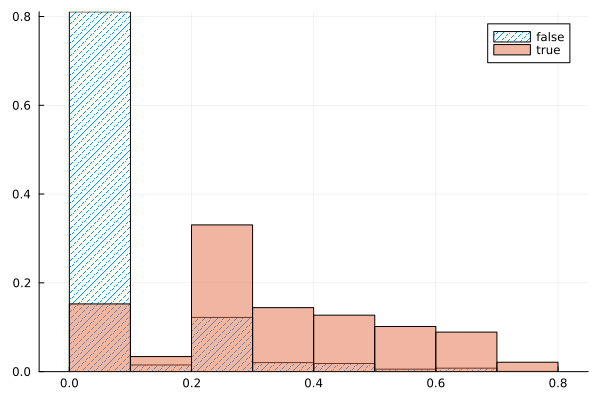

In [60]:
test_groups = groupby(test, :arrest)
histogram(test_groups[(false,)].predict; bins=10, normalize=:probability, fillstyle= :/, label="false")
histogram!(test_groups[(true,)].predict; bins=10, normalize=:probability, fillalpha=0.5, label="true")

In [61]:
@chain test begin
    select(:predict => ByRow(>(0.10)) => :predicted, :arrest => :observed)
    proptable(:predicted, :observed; margins=2)
end

2×2 Named Matrix{Float64}
predicted ╲ observed │    false      true
─────────────────────┼───────────────────
false                │ 0.810602  0.152542
true                 │ 0.189398  0.847458

In [62]:
test_roc = roc(test; score=:predict, target=:arrest)

ROC curve with 62 points, of which 14 on the convex hull

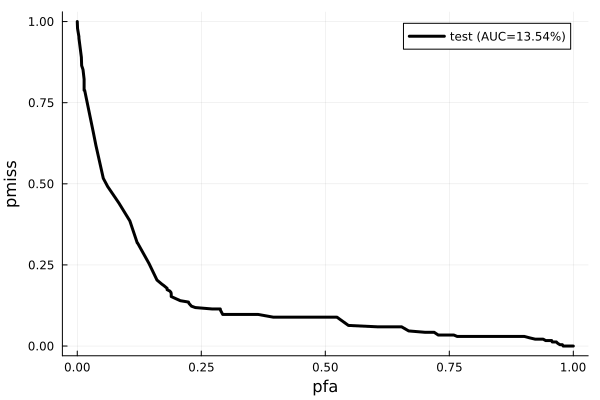

In [63]:
plot(test_roc.pfa, test_roc.pmiss;
    color="black", lw=3,
    label="test (AUC=$(round(100*auc(test_roc), digits=2))%)",
    xlabel="pfa", ylabel="pmiss")

In [64]:
train_roc = roc(train, score=:predict, target=:arrest)

ROC curve with 76 points, of which 16 on the convex hull

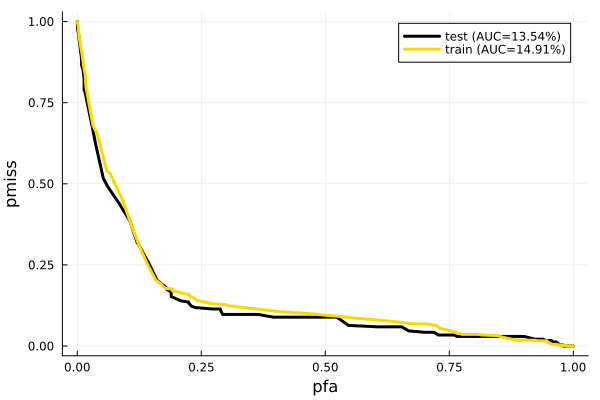

In [65]:
plot!(train_roc.pfa, train_roc.pmiss;
    color="gold", lw=3,
    label="train (AUC=$(round(100*auc(train_roc), digits=2))%)")